# Japan vs. China
### Examining some preliminary infection ratios/trends, we have developed a theory that the Chinese government may be misrepresenting the number of infections they continue to have. To analyze our theory, we are going to compare the reported numbers from Japan in this file and South Korea in another file (all in the master as well). 

## Japan

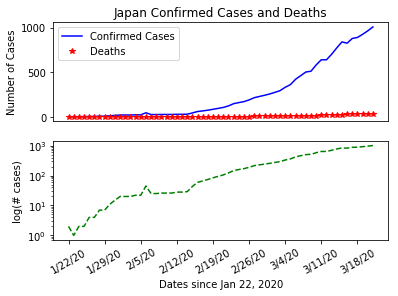

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

try: 
    confirmed_df = pd.read_csv('COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
except IOError:
    print('Something went wrong. Check path, and make sure you have the latest file updates.')
    exit()
try: 
    deaths_df = pd.read_csv('COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
except IOError:
    print('Something went wrong. Check path, and make sure you have the latest file updates.')
    exit()
# Slicing out all the Japan data
japan_dfc = confirmed_df[confirmed_df['Country/Region'] == 'Japan']
japan_dfd = deaths_df[deaths_df['Country/Region'] == 'Japan']
# Removing extraneous data from df
japan_dfc = japan_dfc.drop(columns = ['Province/State','Country/Region', 'Lat', 'Long'])
japan_dfd = japan_dfd.drop(columns = ['Province/State','Country/Region', 'Lat', 'Long'])
# summing columns
japan_dfc = japan_dfc.sum()
japan_dfd = japan_dfd.sum()
# creating dataframes for plotting
japan_frame_conf = {'Japan Total':japan_dfc}
japan_df_conf = pd.DataFrame(japan_frame_conf)
japan_frame_dead = {'Japan Total':japan_dfd}
japan_df_dead = pd.DataFrame(japan_frame_dead)

# Plotting data
# Confirmed Cases
fig = plt.figure()
plt.subplot(211)
plt.title('Japan Confirmed Cases and Deaths')
plt.ylabel('Number of Cases')
plt.xticks([])
plt.plot(japan_df_conf,'b-', label='Confirmed Cases')
plt.plot(japan_df_dead, 'r*', label='Deaths')
plt.legend()

# Deaths
plt.subplot(212)
plt.yscale('log')
plt.ylabel('Number of Cases')
plt.xticks(np.arange(0,len(japan_df_conf),step=7), rotation=30)
plt.xlabel('Dates since Jan 22, 2020')
plt.ylabel('log(# cases)')
plt.plot(japan_df_conf, 'g--')
plt.show()

## China